# Analisis cuentas banco

In [2]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from datetime import datetime

import ipywidgets
from IPython.display import display

import seaborn as sns
sns.set(color_codes=True)

os.chdir('/Volumes/Macintosh HD/_Drive/_Banco/analisis')
files = os.listdir()
print(files)

['.DS_Store', 'analisis_20170725.csv', 'analisis_20170731.csv', 'analisis_20170801.csv']


In [3]:
file = files[-1]

In [4]:
parser = lambda date: pd.datetime.strptime(date, '%d/%m/%y')
data = pd.read_csv(file, encoding='latin1', delimiter=';', date_parser=parser, parse_dates = ['DATE'])
data['dayWeek'] = data.DATE.dt.dayofweek
data['monthYear'] = data.DATE.dt.month
data['dayMonth'] = data.DATE.dt.day
data['YEAR'] = data.DATE.dt.year

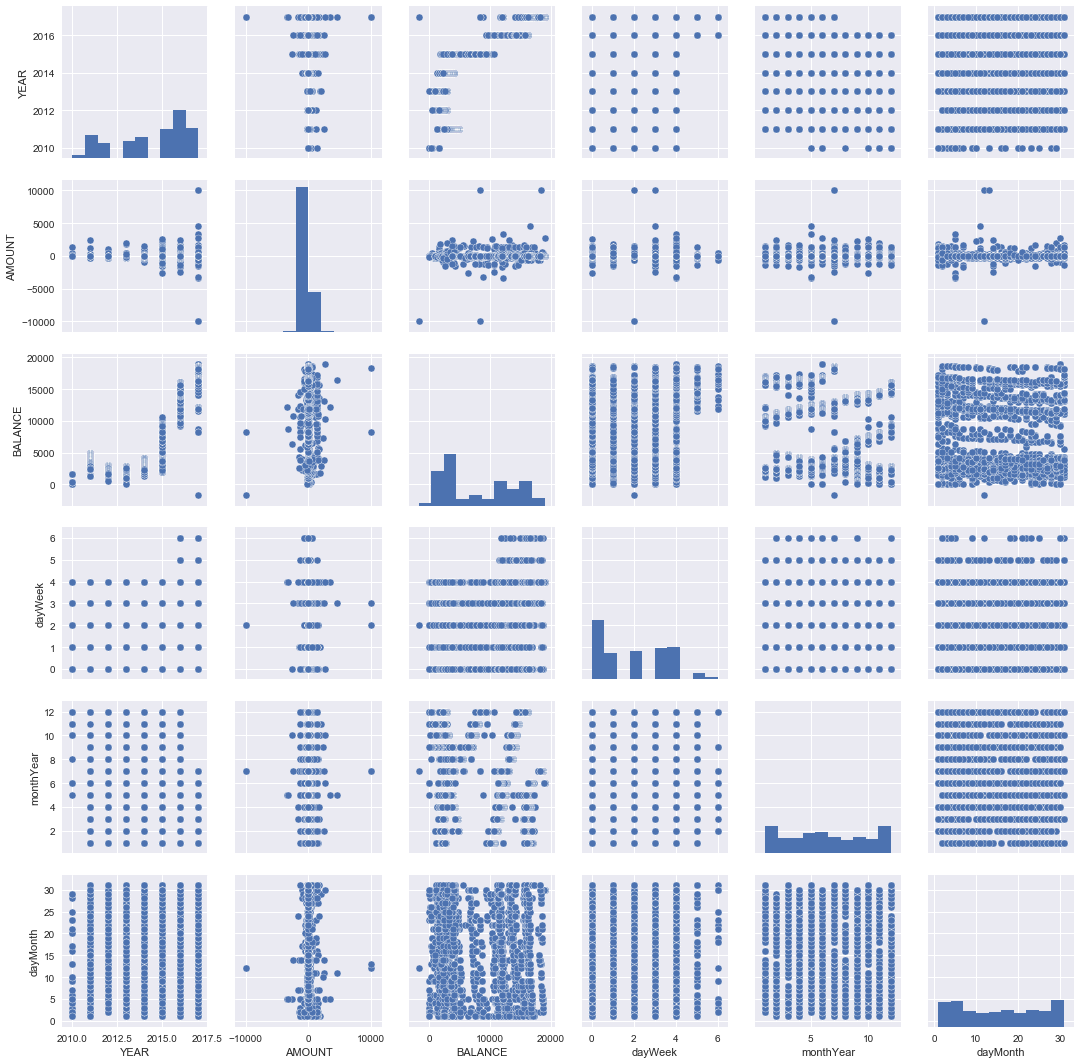

In [5]:
sns.pairplot(data)

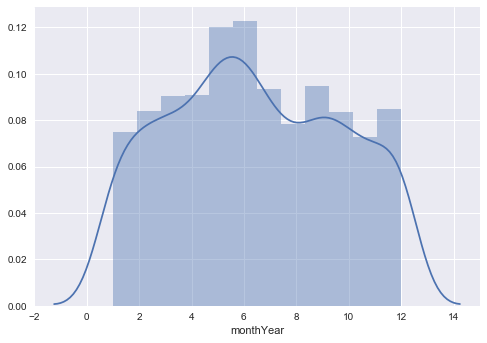

In [6]:
sns.distplot(data.monthYear, bins = 12)

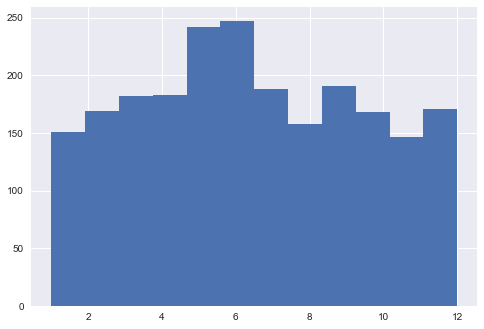

In [7]:
data.monthYear.hist(bins=12)

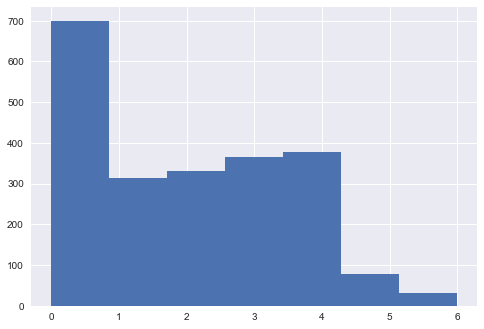

In [8]:
data.dayWeek.hist(bins = 7)

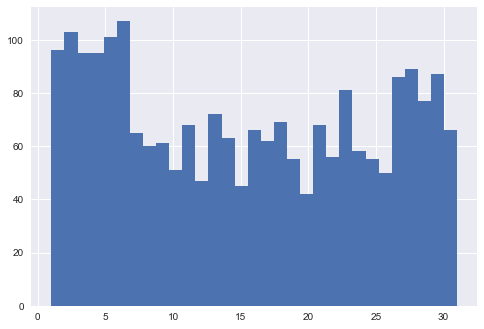

In [9]:
data.dayMonth.hist(bins=31)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 14 columns):
DATE           2196 non-null datetime64[ns]
MONTH          2196 non-null object
YEAR           2196 non-null int64
BANK           2196 non-null object
ACCOUNT        2196 non-null object
TYPE           2088 non-null object
KEYWORDS       2088 non-null object
DESCRIPTION    2196 non-null object
AMOUNT         2196 non-null float64
ING/GAST       2196 non-null object
BALANCE        2196 non-null float64
dayWeek        2196 non-null int64
monthYear      2196 non-null int64
dayMonth       2196 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 240.3+ KB


In [11]:
data.tail(20)

,DATE,MONTH,YEAR,BANK,ACCOUNT,TYPE,KEYWORDS,DESCRIPTION,AMOUNT,ING/GAST,BALANCE,dayWeek,monthYear,dayMonth
2176,2017-07-20,201707-JULY,2017,TRIODOS,CORRIENTE,TELEFONO,"ORANGE,",RECIBO ORANGE ESPAGNE S.A.,-3.63,GASTO,17916.97,3,7,20
2177,2017-07-21,201707-JULY,2017,TRIODOS,CORRIENTE,COMBUSTIBLE,"LECLERC,",COMPRA TARJETA DEBITO LECLERC-PINTO TJ*2017,-30.00,GASTO,17886.97,4,7,21
2178,2017-07-21,201707-JULY,2017,TRIODOS,CORRIENTE,NaN,NaN,DEVOLUCION TARJETA DEBITO,73.22,INGRESO,17960.19,4,7,21
2179,2017-07-21,201707-JULY,2017,TRIODOS,CORRIENTE,HOBBY,"PAYPAL,",RECIBO PAYPAL EUROPE S.A.R.L. ET CIE S.C.A,-26.05,GASTO,17934.14,4,7,21
2180,2017-07-21,201707-JULY,2017,EVO,INTELIGENTE,TRASPASO,"RAIMUNDO,",TRF. RAIMUNDO ABRIL,600.00,INGRESO,18534.14,4,7,21
2181,2017-07-22,201707-JULY,2017,TRIODOS,CORRIENTE,EFECTIVO,"EFECTIVO,",RETIRADA EFECTIVO TARJETA DEBITO,-40.00,GASTO,18494.14,5,7,22
2182,2017-07-24,201707-JULY,2017,TRIODOS,AHORRO,ONLINE,"GOOGLE,",TRANSF DE GOOGLE IRELAND LIMITED ES1013B0YU,74.88,INGRESO,18569.02,0,7,24
2183,2017-07-24,201707-JULY,2017,TRIODOS,CORRIENTE,SUBSCRIPCIONES,"ESADE,",RECIBO ASOC DE ANTIGUOS ALUMNOS DE ESADE,-75.00,GASTO,18494.02,0,7,24
2184,2017-07-27,201707-JULY,2017,TRIODOS,CORRIENTE,RESTAURANTE,"80 GRAD,",COMPRA TARJETA DEBITO 80 GRADOS TJ*2017,-55.20,GASTO,18438.82,3,7,27
2185,2017-07-27,201707-JULY,2017,TRIODOS,CORRIENTE,TREN,"METRO,",COMPRA TARJETA DEBITO METRO DE MADRID S.A. 1 T...,-12.20,GASTO,18426.62,3,7,27


In [12]:
data.describe()

,YEAR,AMOUNT,BALANCE,dayWeek,monthYear,dayMonth
count,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000
mean,2014.470401,8.309003,7827.994686,1.892532,6.418944,15.229053
std,2.053618,549.313506,5733.621663,1.673951,3.288592,9.568356
min,2010.000000,-10000.000000,-1695.390000,0.000000,1.000000,1.000000
25%,2013.000000,-38.982500,2644.067500,0.000000,4.000000,6.000000
50%,2015.000000,-19.430000,5066.810000,2.000000,6.000000,15.000000
75%,2016.000000,-1.900000,13145.052500,3.000000,9.000000,24.000000
max,2017.000000,10000.000000,18945.660000,6.000000,12.000000,31.000000


## Balance

Representación gráfica del balance

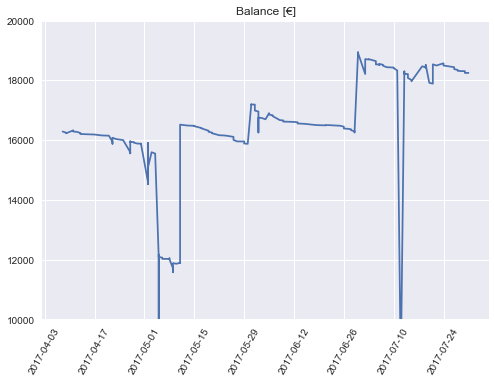

In [13]:
plt.plot(data.DATE.dt.date.tail(200),data.BALANCE.tail(200))
plt.xticks(rotation=60)
plt.ylim(10000,20000)
plt.title('Balance [€]')
plt.show()

### Balance anual

YEAR
2010    1617.91
2011     866.01
2012    -799.30
2013     874.52
2014    -256.24
2015    6956.92
2016    6464.18
2017    2522.57
Name: AMOUNT, dtype: float64

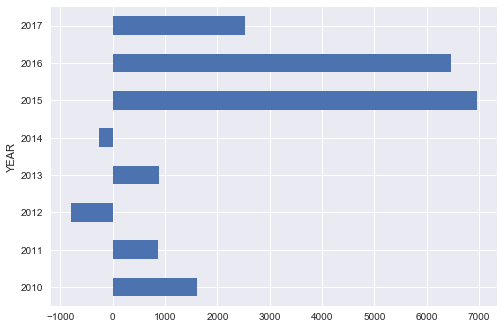

In [14]:
balance_anual = data.groupby('YEAR').sum()['AMOUNT']
balance_anual.plot(kind='barh')
balance_anual

## Balance mensual

DATE  DATE
2016  10       249.01
      11       705.54
      12      1651.80
2017  1        360.62
      2        815.26
      3        -32.69
      4       -984.37
      5       1307.87
      6       1719.11
      7       -663.23
Name: AMOUNT, dtype: float64

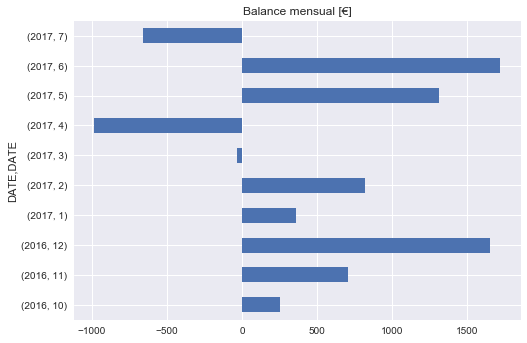

In [15]:
balance_mensual = data.groupby([data.DATE.dt.year,data.DATE.dt.month]).sum()['AMOUNT'].tail(10)
balance_mensual.plot(kind='barh', title='Balance mensual [€]')
balance_mensual

DATE  DATE
2016  10     -1048.91
      11      -670.85
      12      -929.49
2017  1       -918.58
      2      -1795.67
      3      -1376.97
      4       -984.37
      5      -1335.66
      6       -975.07
      7       -663.23
Name: AMOUNT, dtype: float64

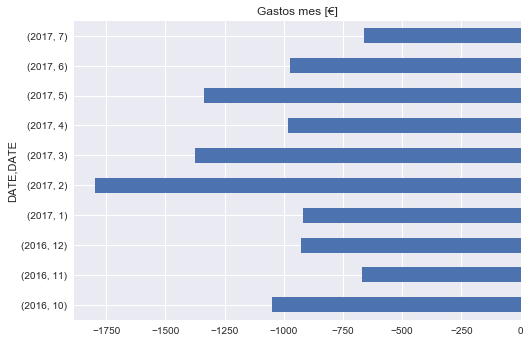

In [16]:
gastos = data.loc[data['TYPE'] != 'TRABAJO']
gastos_mes = gastos.groupby([data.DATE.dt.year,data.DATE.dt.month]).sum()['AMOUNT'].tail(10)
gastos_mes.plot(kind='barh', title='Gastos mes [€]')
gastos_mes

### Balance por concepto

In [17]:
balance_tipo = data.pivot_table(columns='YEAR', index='TYPE', values='AMOUNT', aggfunc='sum', fill_value=0)
balance_tipo['Total'] = balance_tipo.sum(axis=1)
balance_tipo.sort_values(by='Total')

YEAR,2010,2011,2012,2013,2014,2015,2016,2017,Total
TYPE,,,,,,,,,
EFECTIVO,-73.92,-1638.08,-2540.00,-2779.15,591.22,-798.98,-2935.78,-1180.00,-11354.69
ALQUILER,0.00,0.00,0.00,734.00,0.00,-1273.38,-1741.96,-4976.17,-7257.51
HOBBY,0.00,-28.42,-379.91,-381.46,-838.52,-1331.19,-1737.37,-1044.64,-5741.51
COMIDA,0.00,-1006.91,-477.72,-817.39,-306.06,-836.16,-1153.98,-561.16,-5159.38
COMBUSTIBLE,0.00,-117.50,-383.55,-80.00,-141.30,-698.13,-1719.95,-1277.30,-4417.73
TELEFONO,-5.00,0.00,-150.02,-369.14,-344.60,-457.55,-899.31,-579.80,-2805.42
VIAJES,0.00,-62.00,-39.00,-305.17,-428.02,-348.39,-450.00,-148.60,-1781.18
AVIONES,0.00,-43.99,0.00,-524.14,-685.05,0.00,-89.09,0.00,-1342.27
RESTAURANTE,-2.58,-293.87,-72.01,-109.21,-47.26,-175.32,-360.01,-242.20,-1302.46


### Balance por concepto mes

In [18]:
balance_tipo[2017].sort_values().head()

TYPE
ALQUILER      -4976.17
UNIVERSIDAD   -4675.00
COMBUSTIBLE   -1277.30
EFECTIVO      -1180.00
HOBBY         -1044.64
Name: 2017, dtype: float64

In [19]:
balance_tipo[2017].sort_values().tail()

TYPE
TRANSFERENCIA        0.00
OPTICA               0.00
AGUA                 0.00
TRASPASO          7920.00
TRABAJO          10572.12
Name: 2017, dtype: float64

# Conceptos

In [20]:
tipos = sorted(data.TYPE.fillna('').unique())[1:]

In [20]:
dropdown = ipywidgets.Dropdown(
options = tipos,
value = 'COMIDA')
display(dropdown)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("changed to %s" % change['new'])
dropdown.observe(on_change)


In [21]:
tipo = dropdown.value
balance_tipo = data.loc[data['TYPE'] == tipo]

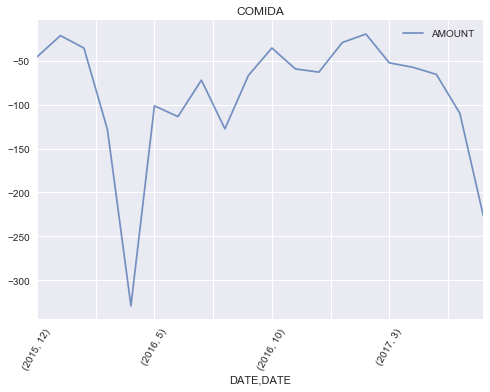

DATE  DATE
2015  12      -45.72
2016  1       -21.41
      2       -35.67
      3      -128.38
      4      -329.03
      5      -101.39
      6      -113.63
      7       -72.16
      8      -127.54
      9       -66.82
      10      -35.56
      11      -59.37
      12      -63.02
2017  1       -29.26
      2       -19.71
      3       -52.48
      4       -57.51
      5       -65.60
      6      -109.91
      7      -226.69
Name: AMOUNT, dtype: float64

In [22]:
tail = 20
balance_tipo_pivot_plot = balance_tipo.pivot_table(index=[data['DATE'].dt.year,data['DATE'].dt.month], 
                                                   values='AMOUNT', aggfunc='sum', 
                                                   fill_value=0).tail(tail).plot(alpha=0.75, rot=60, title = tipo)
plt.show()
balance_tipo_mes = balance_tipo.groupby([data.DATE.dt.year,data.DATE.dt.month]).sum()['AMOUNT'].tail(tail)
balance_tipo_mes

(-75, 75)

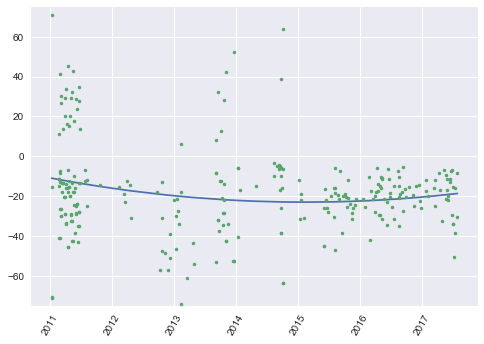

In [23]:
dates = mdates.date2num(balance_tipo.DATE.dt.date.values)
zp = np.polyfit(dates, np.array(balance_tipo.AMOUNT),2)
rp = np.polyval(zp,dates)

plt.plot(balance_tipo.DATE, rp)
plt.plot(balance_tipo.DATE, balance_tipo.AMOUNT, '.')
plt.xticks(rotation=60)
plt.ylim(-75,75)

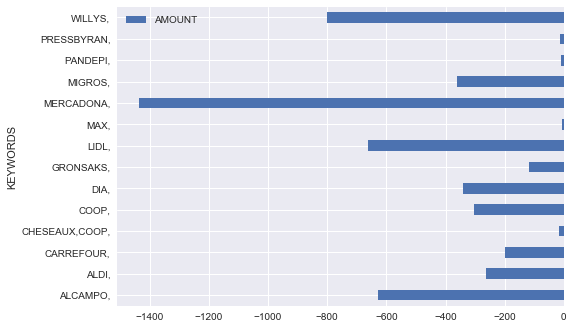

In [24]:
balance_tipo_pivot = balance_tipo.pivot_table(index='KEYWORDS', 
                                              values='AMOUNT', aggfunc='sum', fill_value=0).plot(kind='barh')
plt.show()

In [25]:
balance_tipo_describe = balance_tipo.pivot_table(index=[data['DATE'].dt.year,data['DATE'].dt.month], 
                                                   columns='KEYWORDS',values='AMOUNT', aggfunc='sum', 
                                                   fill_value=0).tail(10)
balance_tipo_describe

KEYWORDS   ALCAMPO,  ALDI,  CARREFOUR,  CHESEAUX,COOP,  COOP,   DIA,  \
DATE DATE                                                              
2016 10        0.00 -20.41         0.0             0.0    0.0   0.00   
     11        0.00   0.00         0.0             0.0    0.0   0.00   
     12      -14.35   0.00         0.0             0.0    0.0   0.00   
2017 1         0.00   0.00         0.0             0.0    0.0   0.00   
     2         0.00   0.00         0.0             0.0    0.0   0.00   
     3         0.00   0.00         0.0             0.0    0.0 -11.84   
     4         0.00   0.00         0.0             0.0    0.0   0.00   
     5         0.00   0.00         0.0             0.0    0.0   0.00   
     6         0.00   0.00         0.0             0.0    0.0   0.00   
     7         0.00 -50.53       -67.5             0.0    0.0 -38.45   

KEYWORDS   GRONSAKS,  LIDL,  MAX,  MERCADONA,  MIGROS,  PANDEPI,  PRESSBYRAN,  \
DATE DATE                                                                       
2016 10          0.0   0.00   0.0      -15.15      0.0       0.0          0.0   
     11          0.0   0.00   0.0      -59.37      0.0       0.0          0.0   
     12          0.0 -26.10   0.0      -22.57      0.0       0.0          0.0   
2017 1           0.0   0.00   0.0      -29.26      0.0       0.0          0.0   
     2           0.0   0.00   0.0      -19.71      0.0       0.0          0.0   
     3           0.0 -24.96   0.0      -15.68      0.0       0.0          0.0   
     4           0.0 -32.29   0.0      -25.22      0.0       0.0          0.0   
     5           0.0 -38.02   0.0      -27.58      0.0       0.0          0.0   
     6           0.0 -19.75   0.0      -90.16      0.0       0.0          0.0   
     7           0.0   0.00   0.0      -61.61      0.0      -8.6          0.0   

KEYWORDS   WILLYS,  
DATE DATE           
2016 10        0.0  
     11        0.0  
     12        0.0  
2017 1         0.0  
     2         0.0  
     3         0.0  
     4         0.0  
     5         0.0  
     6         0.0  
     7         0.0

In [26]:
balance_tipo.tail(10)

,DATE,MONTH,YEAR,BANK,ACCOUNT,TYPE,KEYWORDS,DESCRIPTION,AMOUNT,ING/GAST,BALANCE,dayWeek,monthYear,dayMonth
2119,2017-06-27,201706-JUNE,2017,TRIODOS,CORRIENTE,COMIDA,"MERCADONA,",COMPRA TARJETA DEBITO MERCADONA ALFARERIA TJ*2017,-6.97,GASTO,16379.40,1,6,27
2121,2017-06-28,201706-JUNE,2017,TRIODOS,CORRIENTE,COMIDA,"MERCADONA,",COMPRA TARJETA DEBITO MERCADONA ALFARERIA TJ*2017,-29.61,GASTO,16333.59,2,6,28
2137,2017-07-04,201707-JULY,2017,TRIODOS,CORRIENTE,COMIDA,"CARREFOUR,",COMPRA TARJETA DEBITO CARREFOUR VALLEC TJ*2017,-33.75,GASTO,18674.70,1,7,4
2140,2017-07-05,201707-JULY,2017,TRIODOS,CORRIENTE,COMIDA,"MERCADONA,",COMPRA TARJETA DEBITO MERCADONA RONDA DE ATOCH...,-15.52,GASTO,18588.18,2,7,5
2141,2017-07-05,201707-JULY,2017,TRIODOS,CORRIENTE,COMIDA,"CARREFOUR,",COMPRA TARJETA DEBITO CARREFOUR VALLEC TJ*2017,-33.75,GASTO,18554.43,2,7,5
2148,2017-07-08,201707-JULY,2017,TRIODOS,CORRIENTE,COMIDA,"ALDI,",COMPRA TARJETA DEBITO ALDI SAN SEBASTIAN REYES...,-50.53,GASTO,18438.70,5,7,8
2154,2017-07-12,201707-JULY,2017,TRIODOS,CORRIENTE,COMIDA,"MERCADONA,",COMPRA TARJETA DEBITO MERCADONA RONDA DE ATOCH...,-15.68,GASTO,8304.61,2,7,12
2169,2017-07-15,201707-JULY,2017,TRIODOS,CORRIENTE,COMIDA,"DIA,",COMPRA TARJETA DEBITO SUPERMERCADO DIA TJ*2017,-38.45,GASTO,17968.28,5,7,15
2190,2017-07-28,201707-JULY,2017,EVO,INTELIGENTE,COMIDA,"MERCADONA,",TJ-MERCADONA,-30.41,GASTO,18316.02,4,7,28
2191,2017-07-29,201707-JULY,2017,TRIODOS,CORRIENTE,COMIDA,"PANDEPI,",COMPRA TARJETA DEBITO PANDEPI TJ*2017,-8.60,GASTO,18307.42,5,7,29
